In [65]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from dreamcoder.domains.sketch.sketchPrimitives import *
from dreamcoder.task import Program
from dreamcoder.domains.sketch.main import dreamOfSketches


In [3]:
## GOOD - write way to render this.
## hand inputing a program
from dreamcoder.domains.sketch import sketchPrimitives as T

# p = Program.parse("(lambda (L (l 2 (C $0))))")
# p = Program.parse("(lambda (C (u 4 (loop 5 (lambda (lambda (d 3 (u $1 (C $0))))) $0))))")
# p = Program.parse("(lambda (C (loop 4 (lambda (lambda (d 3 (r 2 (C $0))))) (loop 2 (lambda (lambda (r 2 (L $0))))))))")
# p = Program.parse("(lambda (loop 3 (lambda (lambda (u 2 $0))) $0))")
# p = Program.parse("(lambda (loop 3 (lambda (lambda (u $1 $0)) (u 5 $0))))")

# (u 4 (r 2 x))
p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 k)) (C (loop 4 (lambda (i k) (d i (L k))) k))))")
# p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 2 (u 2 (L x)))) (C (l 2 (LL x)))))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=(-3,3), history=[]))
print(sketch.history)
print(trace)

[((-3, 3), ''), ((-2, 3), ''), ((-1, 3), ''), ((0, 3), ''), ((0, 3), 'C'), ((0, 3), ''), ((0, 3), 'L'), ((0, 2), ''), ((0, 2), 'L'), ((0, 0), ''), ((0, 0), 'L'), ((0, -3), ''), ((0, -3), 'L')]
[((0, 3), 'C'), ((0, 3), 'L'), ((0, 2), 'L'), ((0, 0), 'L'), ((0, -3), 'L')]


In [4]:
p = Program.parseHumanReadable("(lambda (k) (l 2 (l 2 ( C (l 2 k) ))))")
# p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 2 (u 2 (L x)))) (C (l 2 (LL x)))))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=(-3,3), history=[]))
print(sketch.history)
print(trace)
renderPlan(sketch)

[((-3, 3), ''), ((-5, 3), ''), ((-7, 3), ''), ((-7, 3), 'C'), ((-9, 3), '')]
[((-7, 3), 'C')]


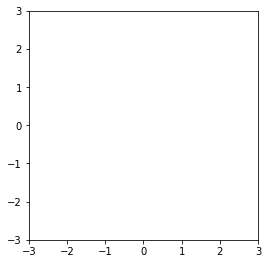

In [7]:
# -- function to render program
from dreamcoder.domains.sketch.sketchPrimitives import renderPlan
renderPlan(sketch)


[((-2, 2), ''), ((-2, 2), 'LL'), ((-1, 2), ''), ((-1, 2), 'LL'), ((0, 2), ''), ((0, 2), 'LL'), ((1, 2), ''), ((1, 2), 'LL'), ((2, 2), ''), ((-2, 2), ''), ((-2, 1), ''), ((-2, 1), 'L'), ((-2, 0), ''), ((-2, 0), 'C'), ((-2, 2), ''), ((-1, 2), ''), ((-1, 1), ''), ((-1, 1), 'L'), ((-1, 0), ''), ((-1, 0), 'C'), ((-1, 2), ''), ((0, 2), ''), ((0, 1), ''), ((0, 1), 'L'), ((0, 0), ''), ((0, 0), 'C'), ((0, 2), ''), ((1, 2), ''), ((1, 1), ''), ((1, 1), 'L'), ((1, 0), ''), ((1, 0), 'C'), ((1, 2), ''), ((2, 2), '')]
---
[((-2, 2), 'LL'), ((-1, 2), 'LL'), ((0, 2), 'LL'), ((1, 2), 'LL'), ((-2, 1), 'L'), ((-2, 0), 'C'), ((-1, 1), 'L'), ((-1, 0), 'C'), ((0, 1), 'L'), ((0, 0), 'C'), ((1, 1), 'L'), ((1, 0), 'C')]


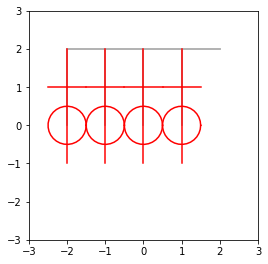

In [67]:
## making supervised tasks
starthand = (-2,2)

# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 k)) (C (loop 4 (lambda (i k) (d i (L k))) k))))")
# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 (C k))) k))")

grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"

grid_embed = f"embed (lambda (k) {grid})"
# vert1 = "embed (lambda (k) (r 2 k))"
vert1 = "embed (lambda (k) (d 1 (C (d 1 (L k)))))"

vertG = lambda p1, p2: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} k)))))"

# p = Program.parseHumanReadable(f"(lambda (k) {grid})")
# p = Program.parseHumanReadable(f"(lambda (k) ({grid_embed} (d 1 (C (d 1 (C k))))))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (d 1 (C (d 1 (C k))))))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) ({vert1} (r 1 ({vert1} ((r 1 ({vert1} ((r 1 ({vert1} (k))))))))))))")
p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vert1} (r 1 k))) k)))")
p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG('L', 'C')} (r 1 k))) k)))")

# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (LL (k))) k))")


sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))
print(sketch.history)
print("---")
print(trace)

renderPlan(sketch)




In [58]:
## likelihood


p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG('L', 'C')} (r 1 k))) k)))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))

def simpleTrace(prog):
    """ gets trace and simplifies"""
    trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))[1]
    # any LL convert to multiple 
    # TODO: didnt do anything. should convert LL to little lines. Before do that should figure out whether to 
    # allow rotation of horizontal to vert line...
        
    
def loss(prog1, prog2):
    """compares prog1 and prog2"""
    trace1 = prog1.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))[1]
    trace2 = prog2.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))[1]
    
    if set(trace1)==set(trace2):
        return 0.0
    else:
        return NEGATIVEINFINITY
    
    
    
    

0.0


In [64]:
executeSketch(p)[1]

[((-2, 2), 'LL'),
 ((-1, 2), 'LL'),
 ((0, 2), 'LL'),
 ((1, 2), 'LL'),
 ((-2, 1), 'L'),
 ((-2, 0), 'C'),
 ((-1, 1), 'L'),
 ((-1, 0), 'C'),
 ((0, 1), 'L'),
 ((0, 0), 'C'),
 ((1, 1), 'L'),
 ((1, 0), 'C')]

In [55]:
set(trace)

{((-2, 0), 'C'),
 ((-2, 1), 'L'),
 ((-2, 2), 'LL'),
 ((-1, 0), 'C'),
 ((-1, 1), 'L'),
 ((-1, 2), 'LL'),
 ((0, 0), 'C'),
 ((0, 1), 'L'),
 ((0, 2), 'LL'),
 ((1, 0), 'C'),
 ((1, 1), 'L'),
 ((1, 2), 'LL')}

In [118]:
dreams = dreamOfSketches(N=50)
[print(d) for d in dreams]

(lambda (r 1 $0))
(lambda (r 2 (loop 4 (lambda (lambda (d 4 $2))) (d 4 (r 3 (l 1 (C (l 1 (C (L (d 1 (C (r 2 (d 2 $0))))))))))))))
(lambda (L $0))
(lambda (l 2 $0))
(lambda (L (u 4 (u 4 (l 1 (l 2 (loop 3 (lambda (lambda (u $1 (loop 4 (lambda (lambda (r 3 $2))) (d $1 (loop 3 (lambda (lambda (r $3 $4))) (d 2 (r 3 (l 1 (L $0)))))))))) (r 3 (L (C $0))))))))))
(lambda (d 2 $0))
(lambda (loop 1 (lambda (lambda (u 2 (C (L (r 4 (C (loop 3 (lambda (lambda (L (l 3 (L (C (C (r 3 (C $0))))))))) (r 4 (u 1 (d $1 (L (loop $1 (lambda (lambda (u 3 (C $4)))) (loop 1 (lambda (lambda (l 4 $0))) (u 2 $2))))))))))))))) (r 3 (l 2 $0))))
(lambda (C $0))
(lambda $0)
(lambda (d 1 (u 4 (C (u 2 (C (C (loop 4 (lambda (lambda (r $1 (C (u 3 (loop 4 (lambda (lambda (l $1 (d $1 (loop 3 (lambda (lambda $4)) $0))))) (r 3 (d 3 (l 2 $2))))))))) $0))))))))
(lambda (loop 2 (lambda (lambda (d 2 (C (d 3 (l 2 (d 3 $0))))))) (C (L (C (r 3 (d 1 (loop 3 (lambda (lambda (r 1 $2))) (C (d 3 (loop 1 (lambda (lambda (d $1 (loop 1 (lamb

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 5 (x)))))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(history=[]))
print(sketch.history)
print(trace)

AssertionError: 